# Implementing a Hough Transform on Edge Detected Image

Now you know how the Hough Transform works, but to accomplish the task of finding lane lines, we need to specify some parameters to say what kind of lines we want to detect (i.e., long lines, short lines, bendy lines, dashed lines, etc.).

To do this, we'll be using an OpenCV function called `HoughLinesP` that takes several parameters. Let's code it up and find the lane lines in the image we detected edges in with the Canny function (for a look at coding up a Hough Transform from scratch, check [this](https://alyssaq.github.io/2014/understanding-hough-transform/) out.) .

`lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)`

OpenCV provides a function named `HoughLinesP` that we will use to find lines in an image.

In this case, we are operating on the image `edges` (the output from `Canny`) and the output from `HoughLinesP` will be `lines`, which will simply be an array containing the endpoints (x1, y1, x2, y2) of all line segments detected by the transform operation. The other parameters define just what kind of line segments we're looking for.

First, `rho` and `theta` are the distance and angular resoltuion of our grid in Hough Space. Remember that, in Hough Space, we ahve a grid laid out along the (Θ, ρ) axis. You need to specify `rho` in units of pixels and `theta` in units of radians.

What are reasonable values? Well, `rho` takes a minimum value fo 1, and a reasonable starting place for `theta` is 1 degree (pi / 180 in radians). cale these values up to be more flexible in your definition of what constitutes a line.

The `threshold` parameter specifies the minimum number of votes (intersections i a given grid cell) a candidate line needs to have to make it into the output. The empty `NP.ARRAY([])` is just a placeholder, no need to change it. `min_line_length` is a minimum length of a line (in pixels) that will accept in the output. `max_line_gap` is the max distance (in pixels) btwn segments that you will allow to be connected into a single line. You can iteration through your output `lines` and draw them onto the image to see what you got!

In [10]:
# imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [11]:
# Read in and grayscale the image
image = mpimg.imread('images/exit-ramp.jpg')
blur_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [12]:
# Gaussian Smoothing
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [13]:
# Canny
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [14]:
# Masking
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

In [15]:
# Hough Transform
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

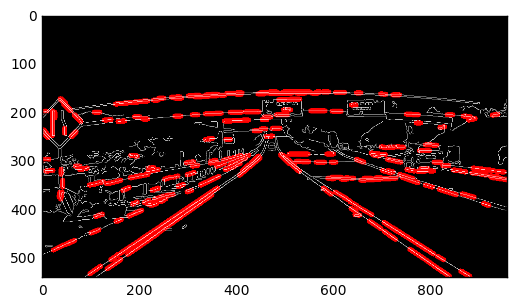

In [16]:
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)
plt.show()